      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

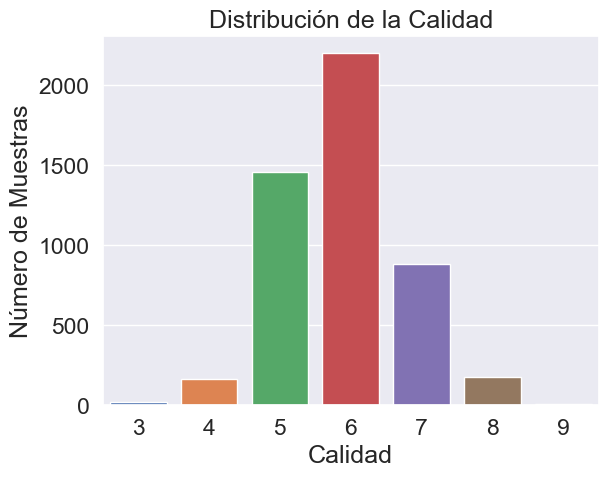

Número de muestras con calidad 3: 20
Número de muestras con calidad 9: 5


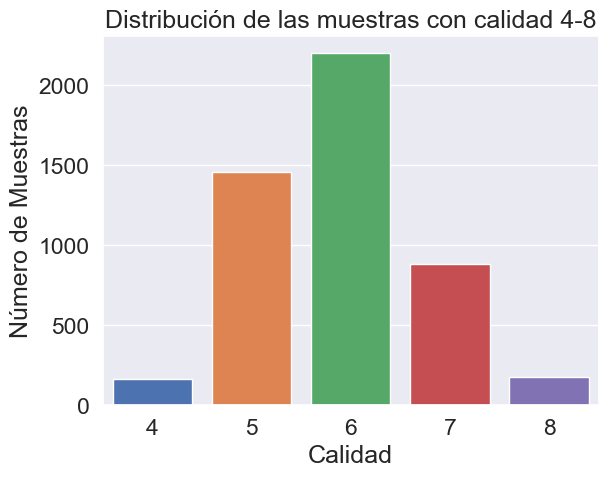

Variance explained by all 12 principal components = 100.0
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0        0.155566          0.021210     0.134983        0.406522   0.215293   
1       -0.562470         -0.018243    -0.287401        0.045533  -0.037780   
2       -0.212095          0.516230    -0.442490       -0.031975   0.211895   
3        0.028418         -0.167022     0.327313       -0.410227   0.502407   
4        0.255407          0.666578     0.054381        0.026974  -0.237911   
5       -0.081648          0.279709     0.156314       -0.275742   0.420341   
6       -0.197581          0.189792     0.070887        0.355871   0.544065   
7       -0.143549          0.229996     0.697747        0.136320  -0.184488   
8        0.631364          0.032734    -0.249769       -0.175951   0.176303   
9        0.212589         -0.121800    -0.105143        0.350660   0.219737   
10      -0.096317         -0.277966    -0.058745        0.207095   0.1075

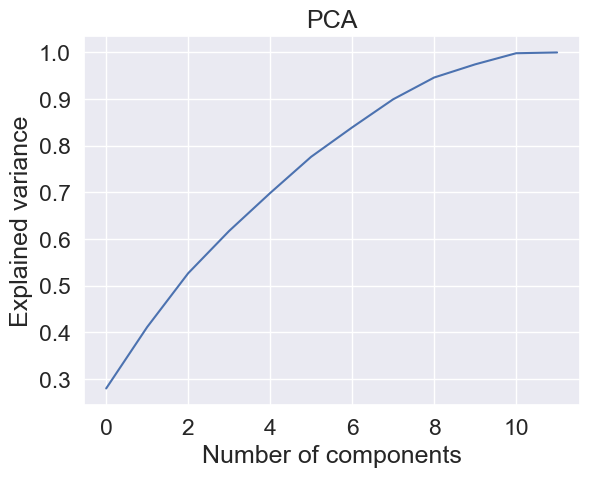

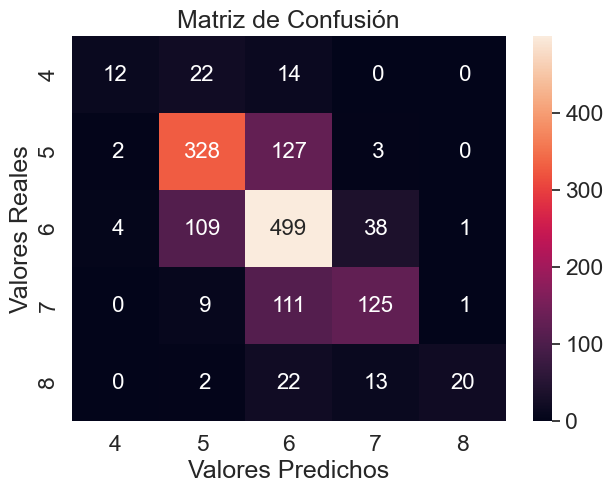

[6 6 5 ... 6 6 6]
Accuracy XGBoost: 0.5328317373461012
Cohen kappa XGB: 0.27817893567158514
[[  0  34  25   0   0]
 [  0 228 210   3   0]
 [  0 131 528  16   0]
 [  0  14 207  23   0]
 [  0   1  31  11   0]]


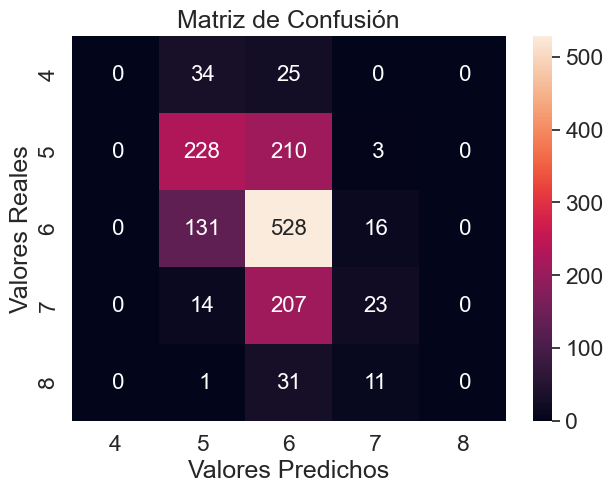

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.decomposition import PCA
import warnings
from tabulate import tabulate

# Importamos la base de datos
vinos=pd.read_excel(r'/Users/varantxa/Desktop/TFG/Wine_data.xlsx', sheet_name='White Wine')

# Comprobamos el número de filas y columnas
vinos.shape

# Hacemos un df de la base de datos
df=pd.DataFrame(vinos)
print(pd.DataFrame(vinos))

# Eliminamos cualquier fila con datos en blanco 
df = df.dropna()

# Vemos qué se ha eliminado
df.info()

# Comprobamos el nombre de las variables 

vinos.columns

# Realizamos un análisis descriptivo de los datos 

descripcion = df.describe()

tabla = descripcion.to_string()
print(tabla)

# Guardar el DataFrame en un archivo CSV
descripcion.to_csv('tabla_resultados2.csv', index=False)

print("La tabla de resultados se ha creado y guardado en el archivo tabla_resultados.csv.")

# Comprobamos que la calidad sigue una desviación normal
sns.countplot(x="quality", data=df, saturation = 3)
plt.title('Distribución de la Calidad')
plt.ylabel('Número de Muestras')
plt.xlabel('Calidad')
plt.show()

# Contamos cuantas muestras hay con calidad 3 ó 9 

count = df['quality'].value_counts()[3]

print('Número de muestras con calidad 3:', count)

count2 = df['quality'].value_counts()[9]

print('Número de muestras con calidad 9:', count2)

# Eliminamos las muestras cuya calidad es superior a 8 e inferior a 4 

df = df.loc[~((df['quality'] == 9))] 
df = df.loc[~((df['quality'] == 3))] 

# Comprobamos que la calidad sigue una desviación normal
sns.countplot(x="quality", data=df, saturation = 3)
plt.title('Distribución de las muestras con calidad 4-8')
plt.ylabel('Número de Muestras')
plt.xlabel('Calidad')
plt.show()


# Proceso para hacer una PCA 
df.shape
X=df.values 
X.shape
   

#Crear el objeto 
scaler = StandardScaler()

#Calcular la media i la desviación estandar
scaler.fit(X)

#Transformar los valores
X_scaled = scaler.transform(X)

# Hacemos PCA con los 12 componentes y una gráfica de la varianza explicada
pca_12 = PCA(n_components=12, random_state=0)
pca_12.fit(X_scaled)
X_pca_12 = pca_12.transform(X_scaled)
print('Variance explained by all 12 principal components =', sum(pca_12.explained_variance_ratio_*100))
pca_12.explained_variance_ratio_*100
np.cumsum(pca_12.explained_variance_ratio_*100)
plt.plot(np.cumsum(pca_12.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('PCA')
new_df = pd.DataFrame(pca_12.components_, columns=list(df.columns))
titulo = "Resultado PCA"
print(new_df, titulo)

# Descriptive statistics for each column
df.describe()

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image

# vemos 5 muestras aleatorias 
df.sample(5, random_state=44)

# Determinamos X e Y
X = df.drop(["quality", "fixed acidity"], axis=1)
y = df["quality"]

# Separamos los datos en sets de train y test, siendo un  30% test y el resto train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

# Creamos el modelo para el random forest y seleccionamos el número de árboles de decisiones y de variables que tiene en cuenta cada árbol
rf_model = RandomForestClassifier(n_estimators=50, max_features="auto", random_state=44)
rf_model.fit(X_train, y_train)

# Hacemos predicciones con nuestro modelo
predictions = rf_model.predict(X_test)
predictions
print(y_test)

rf_model.predict_proba(X_test)
rf_model.feature_importances_

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Random Forest:", accuracy)

# Vamos a ver qué variables tienen más importancia en la predicción

importances = rf_model.feature_importances_
columns = X.columns
i = 0
while i  < len(columns): 
    print(f" The importance of the feature '{columns[i]}' is {round(importances[i]*100, 2)}%.")
    i += 1
    
#test kappa: 

kappa_test = cohen_kappa_score(y_test, y_pred, weights = 'linear')
print('Cohen kappa RF: ' + str(kappa_test))

# Confussion matrix: 
quality_labels = [4, 5, 6, 7, 8]
cm = confusion_matrix(y_test, y_pred, labels=quality_labels)
print(cm)

df_cm = pd.DataFrame(cm, range (5),
                     range(5))
plt.figure(figsize=(7, 5))
sns.set(font_scale=1.5)  #for label size
sns.heatmap(df_cm, annot=True, annot_kws={'size': 16}, fmt='2g')

# Calcular la posición de los ticks centrados en las filas y columnas
tick_positions = np.arange(len(quality_labels))
row_centers = tick_positions + 0.5
column_centers = tick_positions + 0.5

# Alinear los ticks de los ejes al centro de las filas y columnas
plt.xticks(column_centers, quality_labels, ha='center')
plt.yticks(row_centers, quality_labels, va='center')

# Agregar etiquetas
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')

# Mostrar el gráfico
plt.show()

# Probamos otra herramienta: XGBoost 

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

# Extract feature and target arrays
X, y = df.drop('quality', axis=1), df[['quality']]

# Extract text features
cats = X.select_dtypes(exclude=np.number).columns.tolist()


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')    
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
   
y_pred = model.predict(X_test)

print(y_pred)
  
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy XGBoost:', accuracy)

#test kappa: 

kappa_test = cohen_kappa_score(y_test, y_pred, weights = 'linear')
print('Cohen kappa XGB: ' + str(kappa_test))

# Confussion matrix: 
quality_labels = [4, 5, 6, 7, 8]
cm = confusion_matrix(y_test, y_pred, labels = quality_labels)
print(cm)

df_cm = pd.DataFrame(cm, range (5),
                     range(5))
plt.figure(figsize=(7, 5))
sns.set(font_scale=1.5)  #for label size
sns.heatmap(df_cm, annot=True, annot_kws={'size': 16}, fmt='2g')

# Definir las etiquetas de los ejes
plt.xticks(np.arange(len(quality_labels)), quality_labels)
plt.yticks(np.arange(len(quality_labels)), quality_labels)

# Calcular la posición de los ticks centrados en las filas y columnas
tick_positions = np.arange(len(quality_labels))
row_centers = tick_positions + 0.5
column_centers = tick_positions + 0.5

# Alinear los ticks de los ejes al centro de las filas y columnas
plt.xticks(column_centers, quality_labels, ha='center')
plt.yticks(row_centers, quality_labels, va='center')

# Agregar etiquetas
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()
